# Keras Neural Network API
<div style="text-align: justify"> Keras is a <strong>high-level neural networks API</strong>, written in Python and capable of running on top of TensorFlow (The default), CNTK, or Theano. You need to install one of these backends before using Keras.<br >
The core data structure of Keras is a <strong>model</strong>, a way to organize layers. The simplest type of model is the <strong>Sequential</strong> model, a linear stack of layers.

![Keras](https://res-4.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/x3gdrogoamvuvjemehbr)

</div>

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Activation, Dense 
from keras.layers import Flatten
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First, we will load mnist dataset. This dataset consists of 28*28 images of hand-written digits in grey scale.
> Normalizing the dataset significantly improves the result.<br/>
> Keras Datasets: https://keras.io/datasets/

11493376/11490434 [==============================] - 0s 0us/step
Ground Truth Label:  5


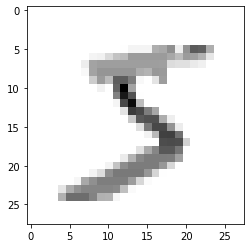

In [0]:
mnist = keras.datasets.mnist 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = keras.utils.normalize(X_train)
X_test = keras.utils.normalize(X_test)

print("Ground Truth Label: ",y_train[0])
plt.imshow(X_train[0], cmap=plt.cm.binary)
# one-hot encoded: (0 0 0 0 1 0 0 0 0 0)

Then we create our sequential model. A sequential model is a linear stack of layers. We add one Flatten layer to convert 28*28 input images into 784 vector.Then we add three dense layers to the model.</br>
You can initialize layers either in model's constructor or using method add().
> A dense layer is a layer where each neuron recieves input from all the neurons in the previous layer.




In [0]:
model = Sequential([
    Flatten(),        # 28*28 2D => 784 1D
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
])

# stacking layers is as easy as .add()
# model.add(Dense(units=32, activation='relu'), input_shape=(100,))

![Softmax](https://i.ibb.co/kXG0fyM/mnist.png)

Then we configure the model's learning process with **compile()** method. 

* **Loss** is the objective that the model will try to minimize.<br/>
categorical_crossentropy = $-\sum_{c=1}^M y_{o,c}log({P_{o,c})}$
* We use "**sparse**" categorical_crossentropy because our targets are integers rather than one-hot encoded!
*   **Adam** is an adaptive learning rate optimization algorithm that's been designed specifically for training deep neural networks.





In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Then we fit our model on training set for 5 epochs.

In [0]:
model.fit(X_train, y_train, epochs=5, batch_size=32)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
60000/60000 [==============================] - 8s 140us/step - loss: 0.2748 - acc: 0.9186
Epoch 2/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.1161 - acc: 0.9637
Epoch 3/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.0808 - acc: 0.9746
Epoch 4/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.0599 - acc: 0.9809
Epoch 5/5
60000/60000 [==============================] - 7s 119us/step - loss: 0.0488 - acc: 0.9842


Afterwards, we evaluate model's performance over test set. Our aim is to build a model that can generalize well.

In [0]:
# you can evaluate the model's performance in one line.
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)

10000/10000 [==============================] - 1s 106us/step
Test Loss:  0.07877984291845933
Test Accuracy:  0.9748


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


Class detected for test image is:  4


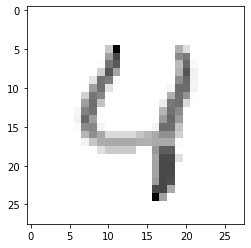

In [0]:
# to generate predictions on new data you can:
plt.imshow(X_test[4], cmap=plt.cm.binary)
classes = model.predict([X_test])
print("Class detected for test image is: ", np.argmax(classes[4]))

> pytorch-ignite and pytorch-lightninig are also high-level API for pytorch.

---


# Deep Dream with Keras
Deep Dream is a computer vision program created by Google! <div style="text-align: justify">Inception movie is fundamental base for Google Deep
Dream. It was introduced on ILSVRC in 2014.  </div>

<div style="text-align: justify">One of the challenges of neural networks is understanding what exactly goes on at each layer. We know that after training, each layer progressively extracts higher and higher-level features of the image, until the final layer essentially makes a decision on what the image shows. One way to visualize what goes on is to turn the network upside down and ask it to enhance an input image in such a way as to highlight a particular interpretation.</br>
Each layer of the network deals with features at a different level of abstraction, so the complexity of features we generate depends on which layer we choose to enhance.</br>
</div>



![DeepDream](https://i.ibb.co/PtkTxc2/Deep-Dream1.png)

# InceptionV3 Network
Inception is a 42 layer deep network presented by Google. This model is heavily-engineered with lots of tricks to push performance. The idea behind Inceptionv3 is to use different filter sizes at each layer and then concatenate them.
1.   Inceptionv1: (GoogLeNet - 2015a)
2.   Inceptionv2: Batch Normalization was added.(2015)
3.   Inceptionv3: Factorization (Reducing # connections and params without losing efficiency) was added.
4.   Inception v4: They made modules more uniform and reduced unnecessary complexities.


![Deep Neural Network](https://i.imgur.com/ZLGqxJl.png)


---



In [0]:
from __future__ import print_function
from keras.preprocessing.image import load_img, save_img, img_to_array
import numpy as np
import scipy
import argparse
from keras.applications import inception_v3
from keras.applications import vgg19
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
def preprocess_image(image_path):
    # Util function to open, resize and format pictures
    # into appropriate tensors.
    img = load_img(image_path)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    print(img.shape)
    ### use random image instead
    # img = np.random.rand(1, 596, 497, 3)
    ###
    img = inception_v3.preprocess_input(img)
    return img

def deprocess_image(x):
    # Util function to convert a tensor into a valid image.
    if K.image_data_format() == 'channels_first':
        x = x.reshape((3, x.shape[2], x.shape[3]))
        x = x.transpose((1, 2, 0))
    else:
        x = x.reshape((x.shape[1], x.shape[2], 3))
    x /= 2.
    x += 0.5
    x *= 255.
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def resize_img(img, size):
    img = np.copy(img)
    if K.image_data_format() == 'channels_first':
        factors = (1, 1,
                   float(size[0]) / img.shape[2],
                   float(size[1]) / img.shape[3])
    else:
        factors = (1,
                   float(size[0]) / img.shape[1],
                   float(size[1]) / img.shape[2],
                   1)
    return scipy.ndimage.zoom(img, factors, order=1)

We load **Inceptionv3** model pre-trained on **ImageNet** dataset. ImageNet is a dataset of over **14 millions** labeled images with around 22000 categories.<br/>
<!-- ![ImageNet Examples](https://devopedia.org/images/article/172/7316.1561043304.png) -->

In [0]:
K.set_learning_phase(0) #test

model = inception_v3.InceptionV3(weights='imagenet',
                                 include_top=False)

# model = vgg19.VGG19(weights='imagenet',include_top=False)
dream = model.input
print('Model loaded.')













87916544/87910968 [==============================] - 3s 0us/step
Model loaded.


In [0]:
for layer in model.layers:
  print(layer.name)

In [0]:
#@title
# These are the names of the layers that we try to maximize their activation
# You can tweak these setting to obtain new visual effects.

# Inceptionv3 Settings
# settings = { #Edge
#     'features': {
#         'conv2d_15':2.,
#     },
# }

settings = { #Curve
    'features': {
        'conv2d_25':2.,
    },
}

# settings = { #Eye Pairs - Do not change!
#     'features': {
#         'conv2d_43': 2.,
#     },
# }

# settings = { #Eyes with Colors
#     'features': {
#         'conv2d_46': 1.,
#     },
# }

# settings = { #multiple layers
#     'features': {
#         'conv2d_46': 1.,
#         'conv2d_44': 0.5,
#         'mixed3': 2.,
#     },
# }

# VGG19

# settings = {
#     'features': {
#         'block5_conv3': 1.,
#     },
# }

# Get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])

# for layer in model.layers:
#   print(layer.name)

We then try to define each layer's weight in the final loss according to the coefficients specified in settings.

In [0]:

# Define the loss.
loss = K.variable(0.)
for layer_name in settings['features']:
    # Add the L2 norm of the features of a layer to the loss.
    if layer_name not in layer_dict:
        raise ValueError('Layer ' + layer_name + ' not found in model.')
    coeff = settings['features'][layer_name]
    x = layer_dict[layer_name].output
    # We avoid border artifacts by only involving non-border pixels in the loss.
    scaling = K.prod(K.cast(K.shape(x), 'float32'))
    if K.image_data_format() == 'channels_first':
        out = K.sum(K.square(x[:, :, 2: -2, 2: -2])) / scaling
        loss = loss + coeff * out
    else:
        out = K.sum(K.square(x[:, 2: -2, 2: -2, :])) / scaling
        loss = loss + coeff * out


Then we define a Keras function to get an input and return loss and gradients for that input based on this new formula of computing loss.<br/>
Gradient ascent formula:<br/>
$X_t$ = $X_{t-1}$ + $\gamma$$f^{'}$($X_{t-1}$)

In [0]:
# Compute the gradients of the dream wrt the loss.
grads = K.gradients(loss, dream)[0]
# Normalize gradients.
grads /= K.maximum(K.mean(K.abs(grads)), K.epsilon())

# Set up function to retrieve the value
# of the loss and gradients given an input image.
outputs = [loss, grads]
fetch_loss_and_grads = K.function([dream], outputs)

def eval_loss_and_grads(x):
    outs = fetch_loss_and_grads([x])
    loss_value = outs[0]
    grad_values = outs[1]
    return loss_value, grad_values

# gradient ascent is an optimization algorithm for finding global minima
def gradient_ascent(x, iterations, step, max_loss=None):
    for i in range(iterations):
        loss_value, grad_values = eval_loss_and_grads(x)
        if max_loss is not None and loss_value > max_loss:
            break
        # print('..Loss value at', i, ':', loss_value)
        x += step * grad_values
    return x

# Algorithm:
*   Load the original image.
*   Define a number of processing scales (i.e. image shapes), from smallest to largest.
*   Resize the original image to the smallest scale.
*   For every scale, starting with the smallest (i.e. current one):
    - Run gradient ascent
    - Upscale image to the next scale
    - Reinject the detail that was lost at upscaling time
*   Stop when we are back to the original size.

Inception model is pre-trained on ImageNet dataset. Therefore if we want to feed a higher resolution image, Deep Dream will result in emergance of small patterns within your input. To overcome this issue, we will do the aforementioned process on different scales of the original image and then sum them up.
![Scaling_for_DeepDream](https://i.ibb.co/3z4mJdS/Deep-Dream2.png)


--2020-03-23 16:11:19--  https://i.ibb.co/7GRkSyM/Richard.jpg
Resolving i.ibb.co (i.ibb.co)... 172.96.140.18, 104.194.8.196
Connecting to i.ibb.co (i.ibb.co)|172.96.140.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83961 (82K) [image/jpeg]
Saving to: ‘Richard.jpg’

Richard.jpg         100%[===================>]  81.99K  --.-KB/s    in 0.06s   

2020-03-23 16:11:19 (1.34 MB/s) - ‘Richard.jpg’ saved [83961/83961]



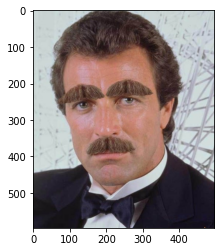

In [0]:
# Tom Selleck (American Actor)
!wget "https://i.ibb.co/7GRkSyM/Richard.jpg"
base_image_path = "Richard.jpg"
plt.imshow(load_img(base_image_path))

(1, 596, 497, 3)
Processing image shape (304, 253)
Processing image shape (425, 355)
Processing image shape (596, 497)


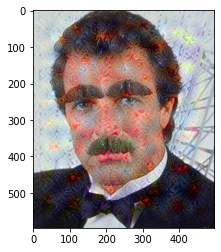

In [0]:

# Playing with these hyperparameters will also allow you to achieve new effects
step = 0.01  # Gradient ascent step size
num_octave = 3  # Number of scales at which to run gradient ascent
octave_scale = 1.4  # Size ratio between scales
iterations = 20  # Number of ascent steps per scale
max_loss = 10.

img = preprocess_image(base_image_path)
if K.image_data_format() == 'channels_first':
    original_shape = img.shape[2:]
else:
    original_shape = img.shape[1:3]
successive_shapes = [original_shape]
for i in range(1, num_octave):
    shape = tuple([int(dim / (octave_scale ** i)) for dim in original_shape])
    successive_shapes.append(shape)
successive_shapes = successive_shapes[::-1]
original_img = np.copy(img)
shrunk_original_img = resize_img(img, successive_shapes[0])

for idx, shape in enumerate(successive_shapes):
    print('Processing image shape', shape)
    img = resize_img(img, shape)
    img = gradient_ascent(img,
                          iterations=iterations,
                          step=step,
                          max_loss=max_loss)
    upscaled_shrunk_original_img = resize_img(shrunk_original_img, shape)
    same_size_original = resize_img(original_img, shape)
    lost_detail = same_size_original - upscaled_shrunk_original_img

    img += lost_detail
    shrunk_original_img = resize_img(original_img, shape)
    # save_img('result'+str(idx)+'.png', deprocess_image(np.copy(img)))

new_img = deprocess_image(np.copy(img))
save_img('result.png', new_img)
plt.imshow(new_img)

## Interesting video of DeepDream
[Interesting Video of Vincent Van Gogh's paintings in Google DeepDream Space](https://youtu.be/I2y6kS7396s)
## Funny Tweet
![Funny but true](https://i.ibb.co/7N0QGsC/Screen-Shot-2020-03-21-at-8-59-14-PM.png)
## DeepDream Generator
> Check out this link if you are interested: [DeepDreamGenerator](https://deepdreamgenerator.com/)

# Resources:

1.   https://keras.io/
2.   https://ai.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html




 **Nicky Bayat**